In [0]:
#from google.colab import files
#from IPython.display import Image
#upload = files.upload()
#part1, q1
#Image('test.jpg',width = 500)

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/'
path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/'
filename = path +'test.jpg'


day.jpg  lab1.ipynb  night.jpg	part3.ipynb  test.jpg


In [0]:
#part1,q2&q3
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import img_as_ubyte,exposure
from skimage.io import imread 
from skimage.exposure import histogram
from skimage.color import rgb2gray

img = io.imread(filename,0)
img = rgb2gray(img)

img = skimage.img_as_ubyte(img, force_copy= False)
#create 1D array 
hist = np.zeros(256)
row, col = img.shape
for i in range(row):
  for j in range(col):
    val = img[i][j]
    hist[val]+=1

plt.plot(hist)
plt.title('My histogram')
plt.show()






/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


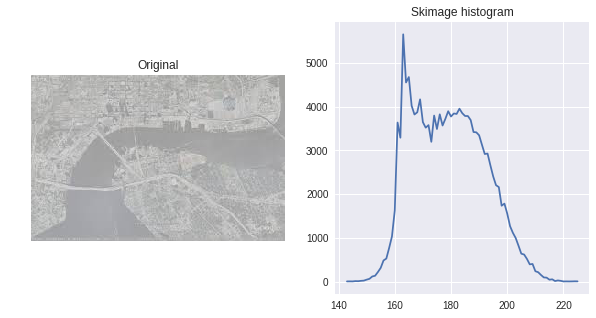

In [31]:
#part1,q4
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte,exposure
from skimage.io import imread 
from skimage.exposure import histogram


img = io.imread(filename,0)
hist, hist_centers = histogram(img,nbins=256)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.set_title("Original")
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)


ax2.set_title("Skimage histogram")
ax2.plot(hist_centers,hist)



(<matplotlib.axes._subplots.AxesSubplot at 0x7f74a9097da0>,
 [<matplotlib.lines.Line2D at 0x7f74a72ab400>])

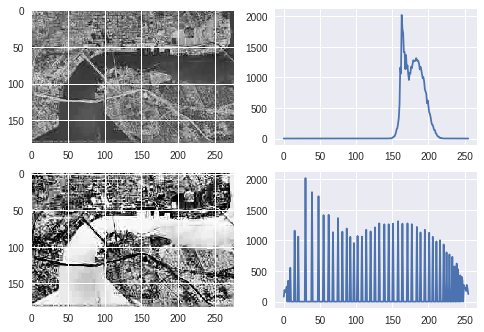

In [32]:
#part2
#plot the original image, its histogram, the image after histogram equalization
#and its histogram

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread(filename,0) #0 set the colour is gray

hist = cv.calcHist([img],[0],None,[256],[0,256]) #use calcHist fun from openCV
eq_img = cv.equalizeHist(img) #equalize the original image
eq_hist = cv.calcHist([eq_img],[0],None,[256],[0,256])

#cumsum = hist.cumsum()#compute the cumulative sum of array,a[0]+a[1]+...+a[n]

#plot original image, its histogram,the images after equalization 
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(2,2,2), plt.plot(hist)
plt.subplot(2,2,3), plt.imshow(eq_img)
plt.subplot(2,2,4), plt.plot(eq_hist)
#note: equalization can increases the global contrast of many images.
#This adjustment can increase the intensities can be better distributed on the histogram
#references: Wikipedia, Greek, Stackoverflow

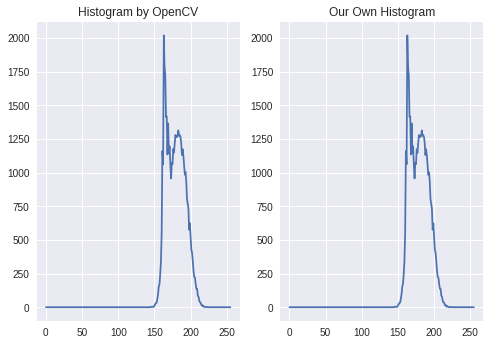

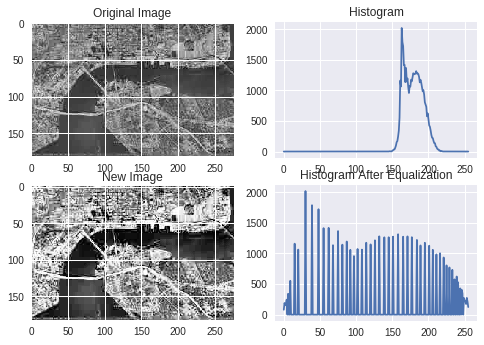

In [30]:
import cv2, numpy as np
from matplotlib import pyplot as plt

def createhist(img):
    # Create 1D array of size 256
    H = np.zeros(256)
    # Iterate over image pixels
    for i in img:
        for j in i:
            H[j] += 1
    return H

# Create histogram by opencv builtin function
def createhistbycv(img):
    histr = cv2.calcHist([img], [0], None, [256], [0, 256])
    return histr

# Compute cumulative histogram
def cumulatehist(hist):
    newhist = []
    for i in range(0, len(hist)):
        if i == 0:
            newhist.append(hist[i])
        else:
            newhist.append(newhist[i-1] + hist[i])
    return newhist

# Histogram equalization
def equahis(hist, originimg):
    cumhist = cumulatehist(hist)
    dimension=list(originimg.shape)
    M = dimension[0]
    N = dimension[1]
    newimg = originimg.copy()
    for m in range(0, M):
        for n in range(0, N):
            newimg[m,n] = int(255*cumhist[int(newimg[m,n])]/int(M*N)+0.5)
    newhist = createhist(newimg)
    cursor=plt.subplot(221)
    cursor.set_title('Original Image')
    plt.imshow(originimg,'gray')
    cursor=plt.subplot(222)
    cursor.set_title('Histogram')
    plt.plot(hist)
    cursor=plt.subplot(223)
    cursor.set_title('New Image')
    plt.imshow(newimg, 'gray')
    cursor=plt.subplot(224)
    cursor.set_title('Histogram After Equalization')
    plt.plot(newhist)
    plt.show()
    return

# Input a list of plots and display in one
def plotmulti(imglist):
    # Use for histogram comparison only
    if len(imglist) == 2:
        cursor=plt.subplot(121)
        cursor.set_title('Histogram by OpenCV')
        plt.plot(imglist[0])
        cursor=plt.subplot(122)
        cursor.set_title('Our Own Histogram')
        plt.plot(imglist[1])
        plt.show()
    return

def main():
    img = cv2.imread(filename,0)
    hist = createhist(img)
    histbycv = createhistbycv(img)
    plotmulti([histbycv, hist])
    equahis(hist, img)

if __name__ == "__main__":
    main()

In [35]:
#part3

from google.colab import drive

drive.mount('/content/gdrive')

!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/'
filename_Day = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/day.jpg'
filename_Night = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab1_Files/night.jpg'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
day.jpg  lab1.ipynb  night.jpg	part3.ipynb  test.jpg


In [0]:
#Your Code 
import cv2,numpy as np
from matplotlib import pyplot as plt


class image():
    def __init__(self):
        self.image = []
        self.histogram = []

    def loadgrayscale(self, filename):
        self.image = cv2.imread(filename, 0)

    def createhist(self):
        if len(self.image) != 0:
            self.histogram = cv2.calcHist([self.image], [0], None, [256], [0, 256])

    def normalizehist(self):
        self.histogram = self.histogram / sum(self.histogram)

    def gethistogram(self):
        return self.histogram


def calculatebc(imageA, imageB):
    # First normalize histograms
    imageA.normalizehist()
    imageB.normalizehist()
    BC = sum(np.sqrt(np.multiply(imageA.gethistogram(), imageB.gethistogram())))
    print("The Bhattacharyya Coefficient of the two histograms is:" )
    #+ str(BC[0])+".\r\n"
    return 


def main():
  imgA = image()
  imgA.loadgrayscale(filename_Day)
  imgA.createhist()
  imgB = image()
  imgB.loadgrayscale(filename_Night)
  imgB.createhist()
  calculatebc(imgA, imgB)

In [47]:
#part3
#Your Code 
import cv2,numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread(filename_Day,0)
img2 = cv2.imread(filename_Night,0)

#img1 = cv2.equalizeHist(img1) #equalize the original image
#img2 = cv2.equalizeHist(img2) #equalize the original image


hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
nor_hist1 = hist1 / sum(hist1)
nor_hist2 = hist2 / sum(hist2)
BC = sum(np.sqrt(np.multiply(nor_hist1, nor_hist2)))
BC2 = sum(np.sqrt(np.multiply(hist1,hist2)))
print("The Bhattacharyya Coefficient of the two histograms is " + str(BC[0])+".\r\n")
print(BC)
print(BC2)



The Bhattacharyya Coefficient of the two histograms is 0.871865.

[0.871865]
[267836.88]


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


The Bhattacharyya Coefficient of the two histograms when the histogram build by two for loop is 0.8669073152345631.

The Bhattacharyya Coefficient of the two histograms when the histogram created by build-in function is 1.0.



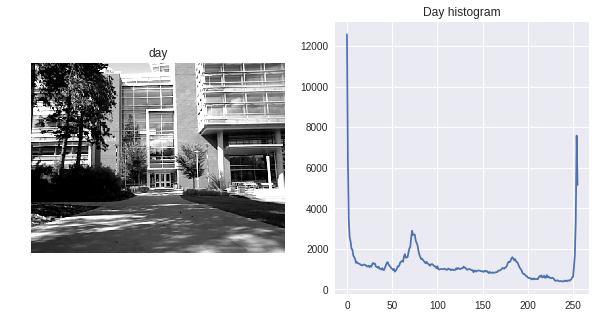

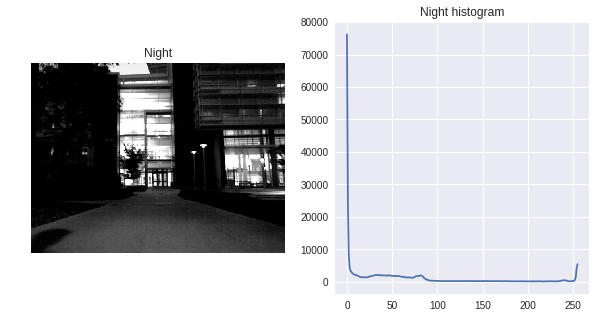

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import img_as_ubyte,exposure
from skimage.io import imread 
from skimage.exposure import histogram
from skimage.color import rgb2gray

#read the two images& convert them to grayscale
img1 = io.imread(filename_Day,0)
img2 = io.imread(filename_Night,0)
img_day = rgb2gray(img1)
img_night = rgb2gray(img2)
img_day = skimage.img_as_ubyte(img_day, force_copy= False)
img_night = skimage.img_as_ubyte(img_night, force_copy= False)

hist_1, hist_centers_1 = histogram(img_day,nbins=256)
hist_2, hist_centers_2 = histogram(img_night,nbins=256)
#plot them out to ensure  data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.set_title("day")
ax1.axis('off')
ax1.imshow(img_day, cmap=plt.cm.gray)

ax2.set_title("Day histogram")
ax2.plot(hist_centers_1,hist_1)

fig, (ax3, ax4) = plt.subplots(1,2, figsize=(10, 5))
ax3.set_title('Night')
ax3.axis('off')
ax3.imshow(img_night,cmap=plt.cm.gray)

ax4.set_title('Night histogram')
ax4.plot(hist_centers_2,hist_2)

#compute their histograms and print Bhattacharyya Coefficient

#create 1D array
#draw two histograms in for loop 
def hist(img):
  hist = np.zeros(256)
  row, col = img.shape
  for i in range(row):
    for j in range(col):
      val = img[i][j]
      hist[val]+=1
  return hist
hist1 = hist(img_day)
hist2 = hist(img_night)

#use nuild_in fun to create hist
hist_1 = histogram(img_day,nbins=256)
hist_2 = histogram(img_night,nbins=256)


#normilize the hist 
def normalize(hist):
  nor_hist = hist / sum(hist)
  return nor_hist
hist1_normal = normalize(hist1)
hist2_normal = normalize(hist2)

nor_hist1 = normalize(hist_1)
nor_hist2 = normalize(hist_2)
BC = sum(np.sqrt(np.multiply(hist1_normal, hist2_normal)))
BC2 = sum(np.sqrt(np.multiply(nor_hist1, nor_hist2)))
print("The Bhattacharyya Coefficient of the two histograms when the histogram build by two for loop is " + str(BC)+".\r\n")
print("The Bhattacharyya Coefficient of the two histograms when the histogram created by build-in function is " + str(BC2[0])+".\r\n")